In [ ]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 4.6 MB/s 
     |████████████████████████████████| 6.8 MB 35.7 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 31.8 MB/s 
     |████████████████████████████████| 596 kB 33.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!git clone https://github.com/jjonhwa/Relation_Extraction.git

Cloning into 'Relation_Extraction'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 48 (delta 11), reused 25 (delta 6), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [7]:
%cd Relation_Extraction
from utils.nlpdata_eda import corpus_statistic_with_graph
from dataset import load_data, label_to_num
from transformers import AutoTokenizer

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

/content/Relation_Extraction


In [8]:
MODEL_NAME = 'klue/bert-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [9]:
train_dataset = load_data("/content/drive/MyDrive/KLUE-RE/dataset/train/train.csv")
test_dataset = load_data('/content/drive/MyDrive/KLUE-RE/dataset/test/test_data.csv')
train_label = label_to_num(train_dataset['label'])

## Check Tokenizer Format

In [10]:
example_format = list(train_dataset['sentence'])[0]
print(tokenizer.tokenize(example_format))

['〈', 'So', '##me', '##th', '##ing', '〉', '는', '조지', '해리', '##슨', '##이', '쓰', '##고', '비틀즈', '##가', '1969', '##년', '앨범', '《', 'Ab', '##be', '##y', 'Ro', '##ad', '》', '에', '담', '##은', '노래', '##다', '.']


## Train/Test Dataset - Check Tokenizer

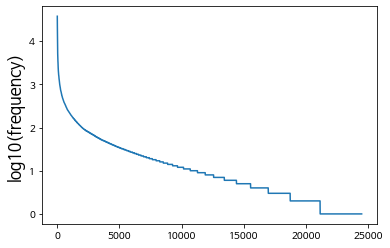

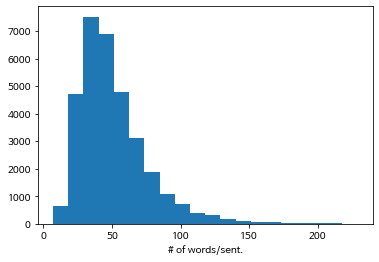

{'texts': 32470, 'num_unique_words': 24478, 'maxinum': 455, 'minimum': 14, 'mean': 97.08395441946412, 'median': 87.0, 'word_maximum': 229, 'word_minimum': 7, 'word_mean': 50.95860794579612, 'word_median': 46.0, 'TOP10_word': [',', '.', '##의', '##다', '##을', '##에', '##는', '##년', '(', ')']}


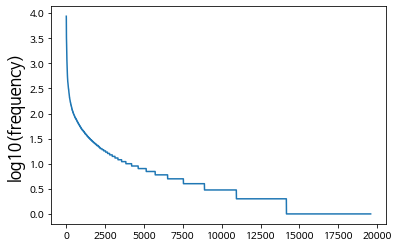

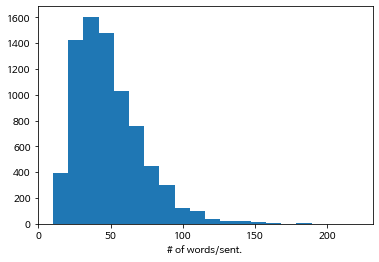

{'texts': 7765, 'num_unique_words': 19589, 'maxinum': 432, 'minimum': 17, 'mean': 92.96497102382486, 'median': 85.0, 'word_maximum': 221, 'word_minimum': 10, 'word_mean': 49.2, 'word_median': 45.0, 'TOP10_word': ['.', '##을', '##다', '##는', '##의', ',', '##에', '##를', '##이', '##은']}


In [11]:
checks = ['train', 'test']
for check in checks :
    if check == 'train' :
        train_eda = corpus_statistic_with_graph(list(train_dataset['sentence']), tokenizer_type = 'wordpiece', tokenizer = tokenizer)
        print(train_eda)
    elif check == 'test' :
        test_eda = corpus_statistic_with_graph(list(test_dataset['sentence']), tokenizer_type = 'wordpiece', tokenizer = tokenizer)
        print(test_eda)

In [12]:
# Token Length가 128이상인 Data의 비율 확인
drop_sentence_list = ([], [])
for check in checks :
    if check == 'train' :
        sentence = train_dataset['sentence']
    elif check == 'test' :
        sentence = test_dataset['sentence']

    for i, sent in enumerate(sentence) :
        words = tokenizer.tokenize(sent)
        if len(words) > 128 :
            if check == 'train' :
                drop_sentence_list[0].append(i)
            elif check == 'test' :
                drop_sentence_list[1].append(i)

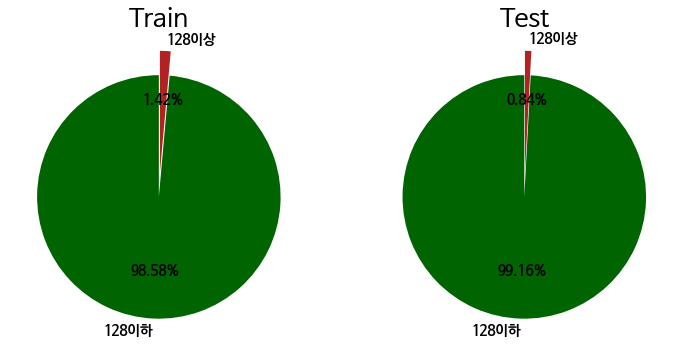

In [13]:
import matplotlib.pyplot as plt

train_out = (len(drop_sentence_list[0]) / len(train_dataset))*100
test_out = (len(drop_sentence_list[1]) / len(test_dataset))*100
train_in = 100-train_out
test_in = 100-test_out

train_ratio = [train_in, train_out]
test_ratio = [test_in, test_out]

train_labels = ['128이하', '128이상']
test_labels = ['128이하', '128이상']

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(train_ratio, 
        labels=train_labels,
        autopct='%.2f%%',
        colors=['darkgreen', 'firebrick'],
        startangle=90,
        textprops={'fontsize':14, 'weight': 'bold'},
        shadow=False,
        explode=(0.1, 0.1))
plt.title('Train', size=25)

plt.subplot(1,2,2)
plt.pie(test_ratio, 
        labels=test_labels,
        autopct='%.2f%%',
        colors=['darkgreen', 'firebrick'],
        startangle=90,
        textprops={'fontsize':14, 'weight': 'bold'},
        shadow=False,
        explode=(0.1, 0.1))
plt.title('Test', size=25)
plt.show()

## 각 Label별 Token Length 분포

In [14]:
# Dataset에서 label -> num_lable로 해서 tmp_dataset 생성
train_dataset['num_label'] = label_to_num(train_dataset['label'])
tmp_dataset = train_dataset.copy()
tmp_dataset.drop('label', axis = 1, inplace = True)
train_dataset.drop('num_label', axis = 1, inplace = True)

Label: 0


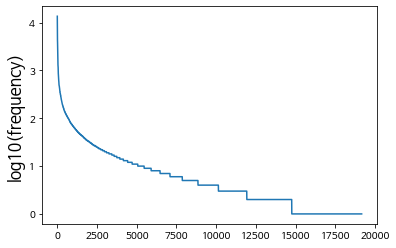

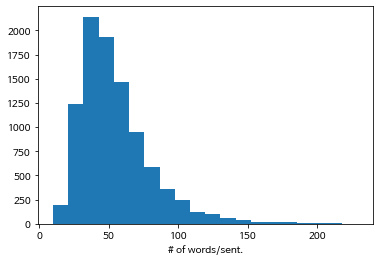

##################################################
##################################################
Label: 1


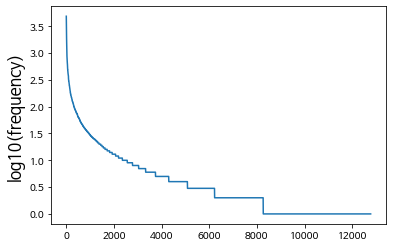

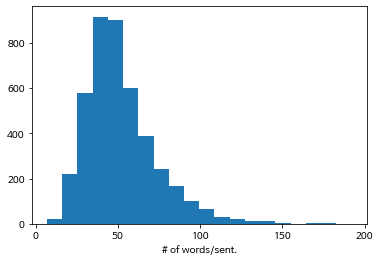

##################################################
##################################################
Label: 2


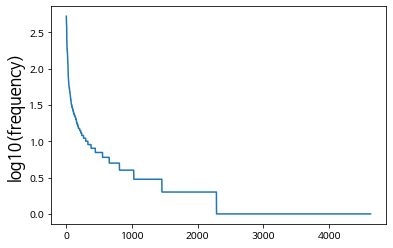

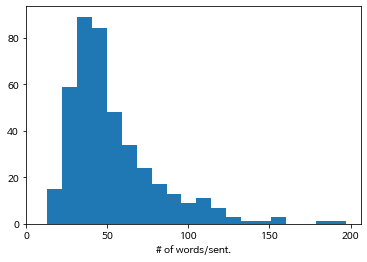

##################################################
##################################################
Label: 3


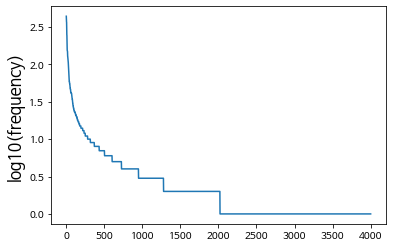

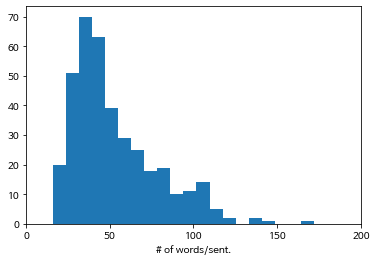

##################################################
##################################################
Label: 4


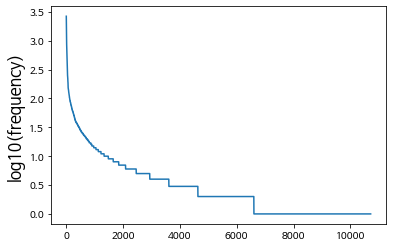

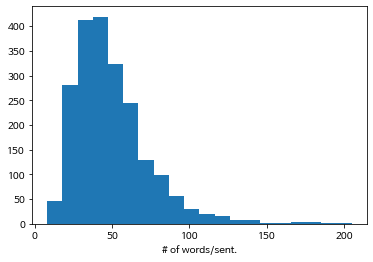

##################################################
##################################################
Label: 5


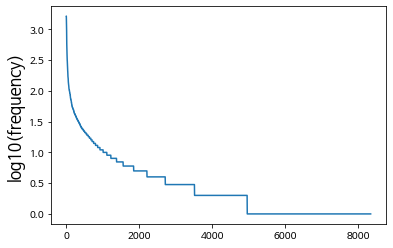

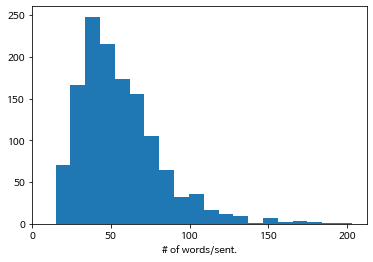

##################################################
##################################################
Label: 6


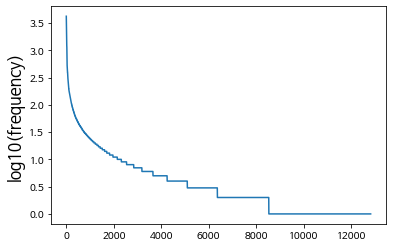

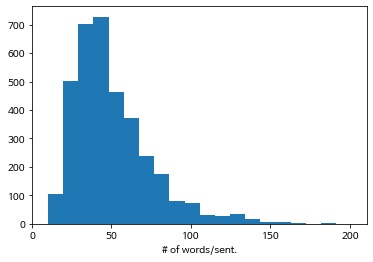

##################################################
##################################################
Label: 7


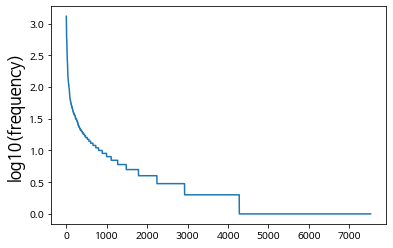

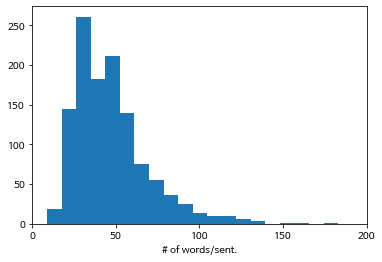

##################################################
##################################################
Label: 8


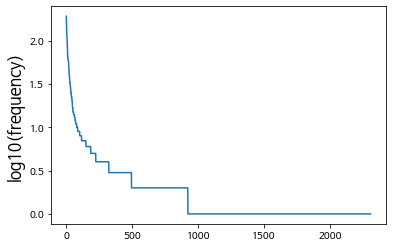

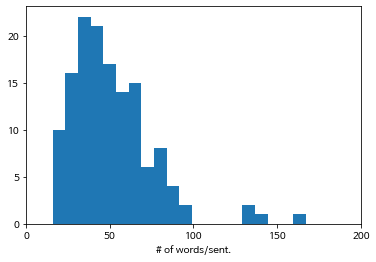

##################################################
##################################################
Label: 9


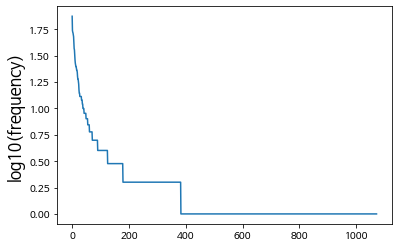

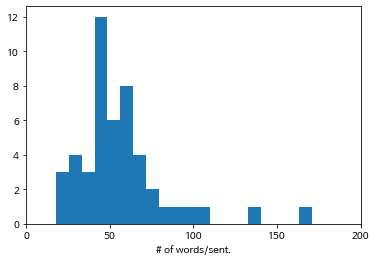

##################################################
##################################################
Label: 10


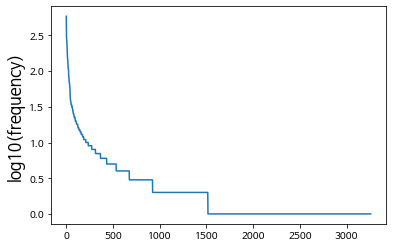

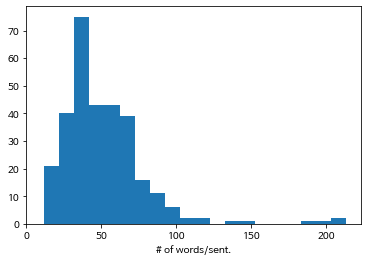

##################################################
##################################################
Label: 11


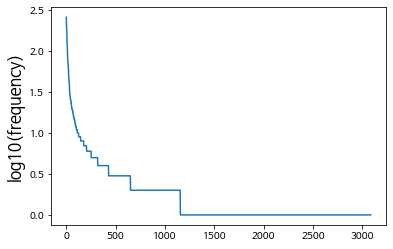

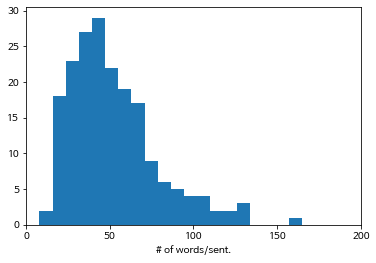

##################################################
##################################################
Label: 12


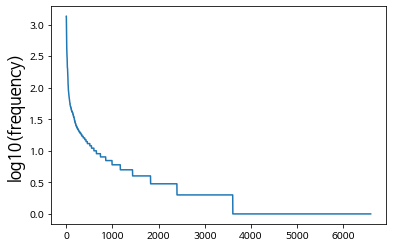

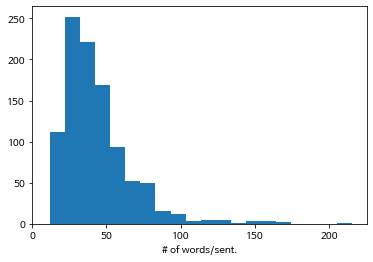

##################################################
##################################################
Label: 13


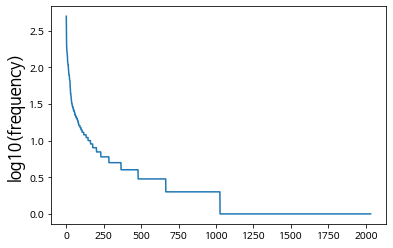

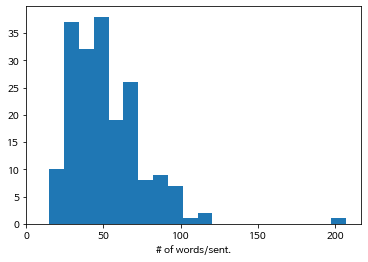

##################################################
##################################################
Label: 14


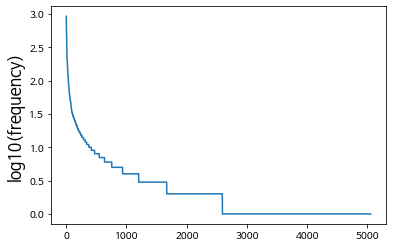

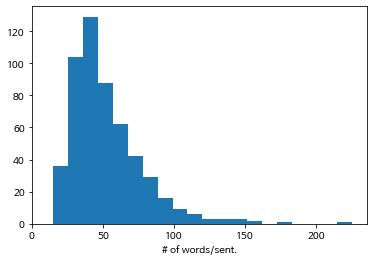

##################################################
##################################################
Label: 15


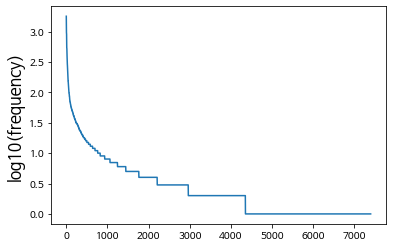

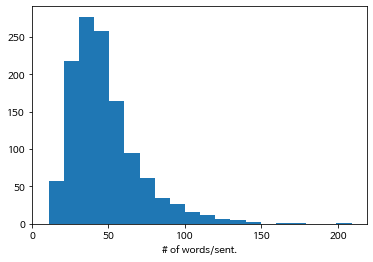

##################################################
##################################################
Label: 16


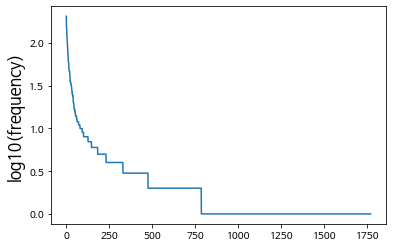

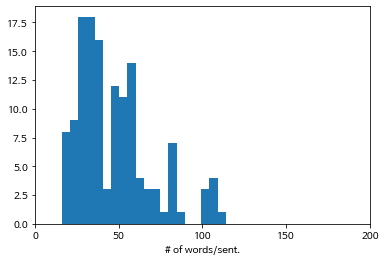

##################################################
##################################################
Label: 17


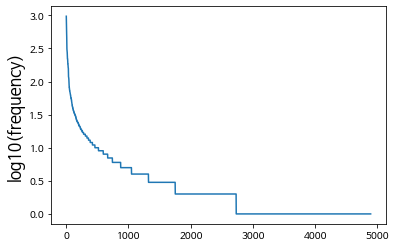

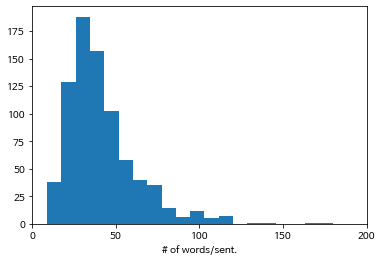

##################################################
##################################################
Label: 18


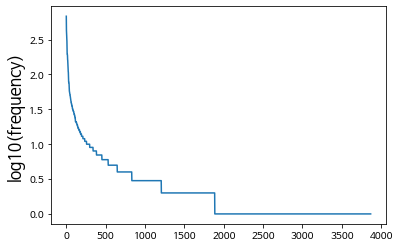

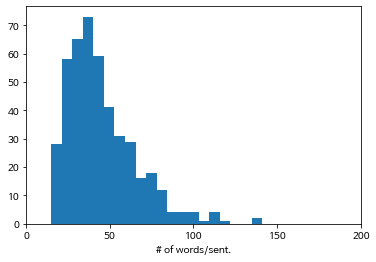

##################################################
##################################################
Label: 19


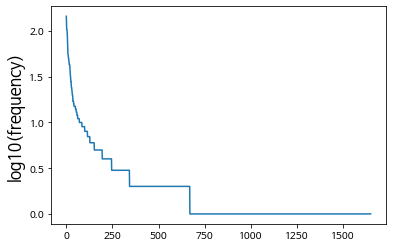

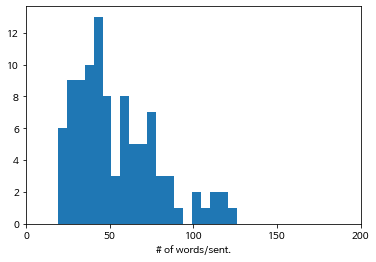

##################################################
##################################################
Label: 20


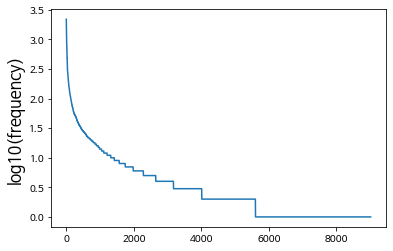

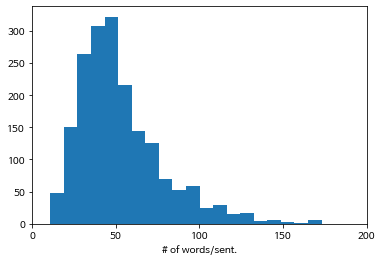

##################################################
##################################################
Label: 21


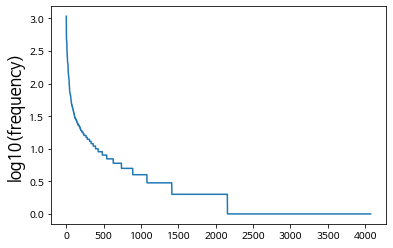

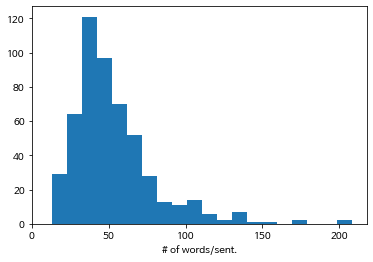

##################################################
##################################################
Label: 22


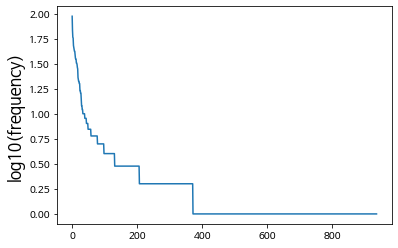

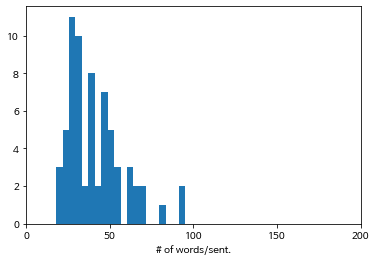

##################################################
##################################################
Label: 23


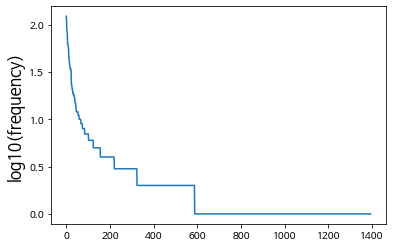

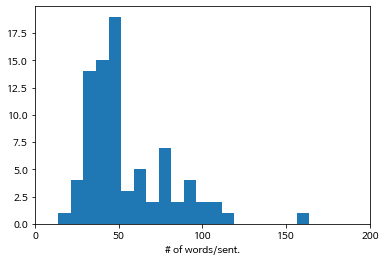

##################################################
##################################################
Label: 24


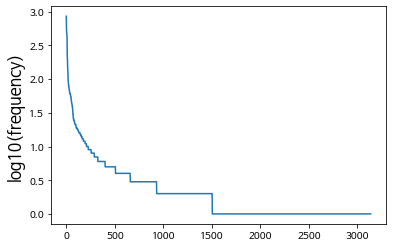

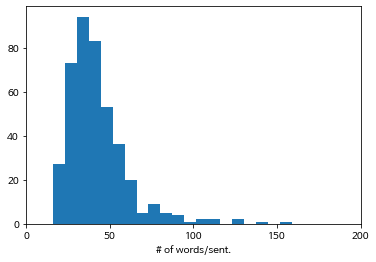

##################################################
##################################################
Label: 25


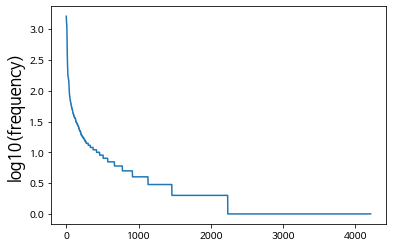

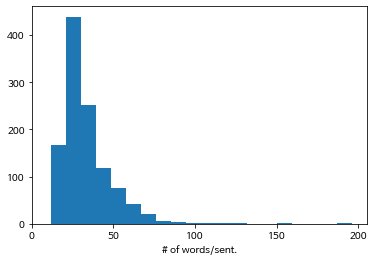

##################################################
##################################################
Label: 26


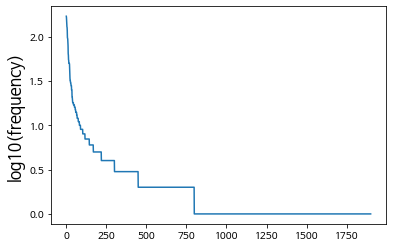

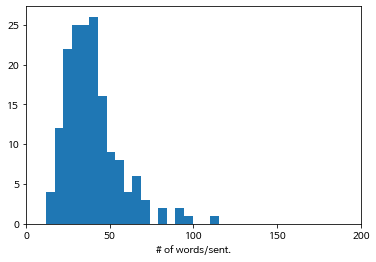

##################################################
##################################################
Label: 27


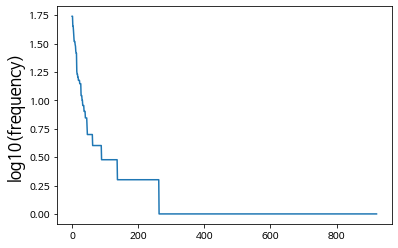

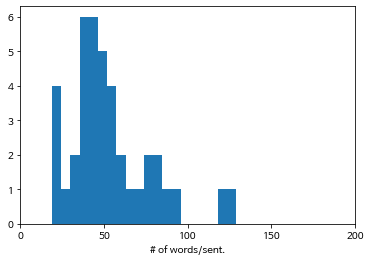

##################################################
##################################################
Label: 28


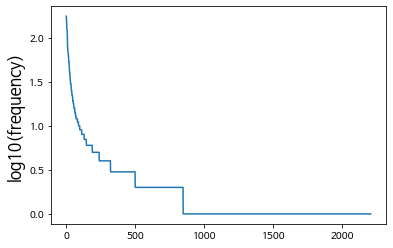

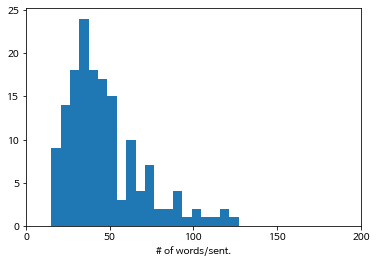

##################################################
##################################################
Label: 29


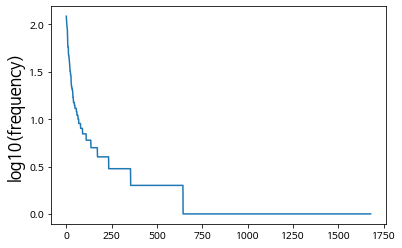

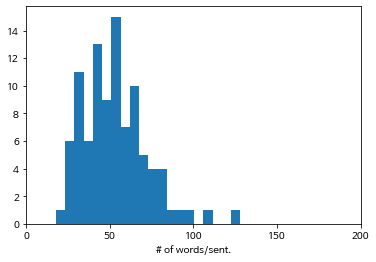

##################################################
##################################################


In [15]:
for i in range(30) :
    print(f'Label: {i}')
    temp_dataset = tmp_dataset[tmp_dataset['num_label'] == i]
    corpus_statistic_with_graph(list(temp_dataset['sentence']), tokenizer_type = 'wordpiece', tokenizer = tokenizer)
    print('#' * 50)
    print('#' * 50)

## 전체 Dataset에서 각 Label별 분포

In [16]:
train_dataset['num_label'] = label_to_num(train_dataset['label'])

In [17]:
label_name = []
label_count = []
for i in range(30):
    label_name.append(train_dataset[train_dataset['num_label'] == i].iloc[0]['label'])
    label_count.append(list(train_dataset['num_label']).count(i))

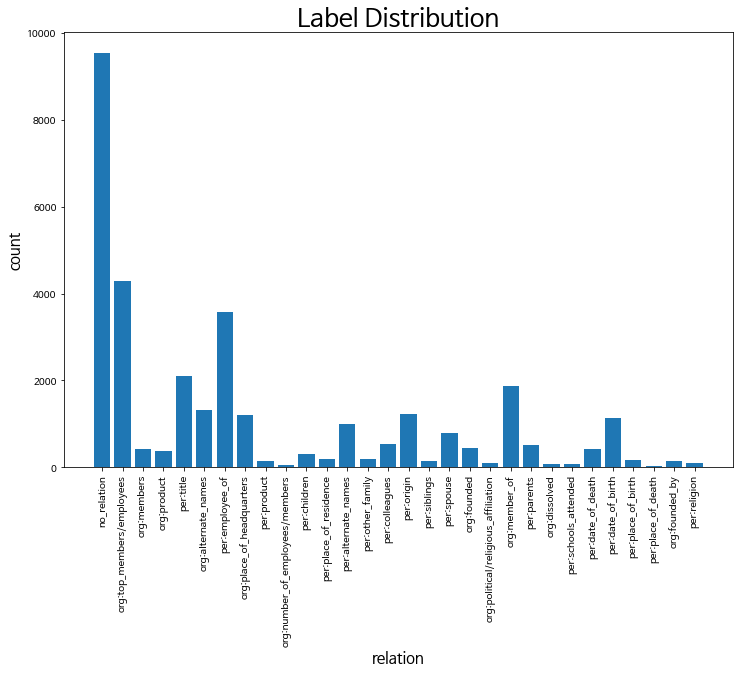

In [18]:
plt.figure(figsize = (12,8))
plt.bar(range(len(label_name)), label_count)
plt.title('Label Distribution', size=25)
plt.ylabel('count', size=15)
plt.xlabel('relation', size=15)
plt.xticks(range(len(label_name)), label_name, rotation=90)
plt.show()